In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier

In [30]:
def get_data():
    data = np.loadtxt("iris.txt")
    iris_data = data[50:]
    return iris_data 

#######################################################################

def get_train_and_test(feature):
    iris_data = get_data()

    positive_data = iris_data[:50, feature]
    positive_data = np.expand_dims(positive_data, axis=2)

    negative_data = iris_data[50:, feature]
    negative_data = np.expand_dims(negative_data, axis=2)

    train_data_positive = positive_data[:25]
    train_data_negative = negative_data[:25]

    test_data_positive = positive_data[25:]
    test_data_negative = negative_data[25:]

    train_data = np.concatenate((train_data_positive, train_data_negative), axis=0)
    test_data = np.concatenate((test_data_positive, test_data_negative), axis=0)

    train_label = ['positive'] * len(train_data_positive) + ['negative'] * len(train_data_negative)
    test_label = ['positive'] * len(test_data_positive) + ['negative'] * len(test_data_negative)

    return(train_data, test_data, train_label, test_label, 
            train_data_positive, train_data_negative, test_data_positive, test_data_negative)

#########################################################################################################

def get_test_and_train(feature):
    iris_data = get_data()

    positive_data = iris_data[:50, feature]
    positive_data = np.expand_dims(positive_data, axis=2)

    negative_data = iris_data[50:, feature]
    negative_data = np.expand_dims(negative_data, axis=2)

    train_data_positive = positive_data[25:]
    train_data_negative = negative_data[25:]

    test_data_positive = positive_data[:25]
    test_data_negative = negative_data[:25]

    train_data = np.concatenate((train_data_positive, train_data_negative), axis=0)
    test_data = np.concatenate((test_data_positive, test_data_negative), axis=0)

    train_label = ['positive'] * len(train_data_positive) + ['negative'] * len(train_data_negative)
    test_label = ['positive'] * len(test_data_positive) + ['negative'] * len(test_data_negative)

    return(train_data, test_data, train_label, test_label, 
            train_data_positive, train_data_negative, test_data_positive, test_data_negative)

#########################################################################################################

def get_sigma(train_data):
    sigma = 0
    n = len(train_data)
    vector_u = np.mean(train_data, axis=0)

    for i in range(n):
        sigma += (train_data[i] - vector_u).dot((train_data[i] - vector_u).T)

    sigma = 1 / (n - 1) * sigma
    return(sigma)

#########################################################################################################

def get_weight():

    sigma = get_sigma(train_data)

    vector_u1, vector_u2 = get_vector_u1_and_u2(train_data_positive, train_data_negative)
    
    vector_w = (vector_u1 - vector_u2).T.dot(np.linalg.inv(sigma))

    return(vector_w)

#########################################################################################################

def get_bias(train_data, C12, C21): 
    N1 = 25
    N2 = len(train_data) - 25

    pi1 = N1 / (N1 + N2)
    pi2 = N2 / (N1 + N2)

    sigma = get_sigma(train_data)

    vector_u1, vector_u2 = get_vector_u1_and_u2(train_data_positive, train_data_negative)

    bias = -0.5 * (vector_u1 - vector_u2).T.dot(np.linalg.inv(sigma)).dot(vector_u1 + vector_u2).dot(np.log(C12 * pi2 / C21 * pi1))

    return(bias)

#########################################################################################################

def get_vector_u1_and_u2(train_data_positive, train_data_negative):
    vector_u1 = np.mean(train_data_positive, axis=0)
    vector_u2 = np.mean(train_data_negative, axis=0)

    return(vector_u1, vector_u2)

#########################################################################################################

def get_w1_and_w2_b(weight, bias):
    weight = get_weight()
    bias = get_bias(train_data, C12, C21)
    w1 = weight[0, 0]
    w2 = weight[0, 1] 
    b = bias[0,0]

    return(w1, w2, b)

#########################################################################################################

def get_hyperplane(train_data_positive, train_data_negative):
    w1, w2, b = get_w1_and_w2_b(weight, bias)

    y1 = (-b - w1 * 0) / w2
    y2 = (-b - w1 * 5) / w2

    plt.clf() 
    plt.cla()
    plt.close() 
    
    plot_x = [0, 10]
    plot_y = [y1, y2]

    plt.plot([plot_x[0], plot_x[1]], [plot_y[0], plot_y[1]], color='red', marker='o', linestyle='dashed', linewidth=2, markersize=5)
    plt.xlabel("Feature 3")
    plt.ylabel("Feature 4")
    


    for i in range(len(train_data_positive)):
        vector_x = train_data_positive[i, 0]
        vector_y = train_data_positive[i, 1]

        plt.plot(vector_x, vector_y, 'bo')

    for j in range(len(train_data_negative)):
        vector_x = train_data_negative[j, 0]
        vector_y = train_data_negative[j, 1]

        plt.plot(vector_x, vector_y, 'ro')
        
    return 

#########################################################################################################

def get_slope(weight, bias):
    w1, w2, b = get_w1_and_w2_b(weight, bias)

    y1 = (-b - w1 * 0) / w2
    y2 = (-b - w1 * 1) / w2

    if y2 - y1 > 0:
        return 'positive'
    else:
        return 'negative'

#########################################################################################################

def get_predict(test_data):
    TP, FN, FP, TN = 0, 0, 0, 0
    right_counts = 0

    w1, w2, b = get_w1_and_w2_b(weight, bias)

    for i in range(len(test_data)):

        x = test_data[i, 0]
        y = test_data[i, 1]

        hyperplane_height = (-b - w1 * x) / w2

        dis = hyperplane_height - y 

        predict=''

        hyperplane_slope = get_slope(weight, bias)

        if hyperplane_slope == 'positive':
            if dis > 0:
                predict = 'negative'
            else:
                predict = 'positive'  
        else:
            if dis > 0:
                predict = 'positive'
            else:
                predict = 'negative'

        
        if predict == 'positive' :
            if test_label[i] == 'positive':
                TP += 1
                right_counts += 1
            else:
                FP += 1
        else:
            if test_label[i] == 'negative':
                TN += 1
                right_counts += 1
            else:
                FN += 1

    accuracy = (right_counts / len(test_data)) * 100
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)

    return accuracy, TPR, FPR

Accuracy_1 is 50.0%


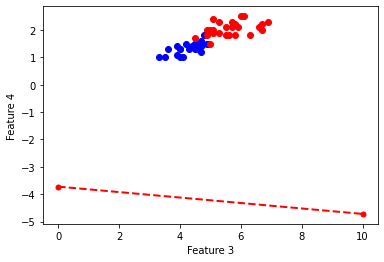

In [31]:
# part 1 _ 1
feature = [2, 3]
C12, C21 = 1, 1

train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative = get_train_and_test(feature)

weight = get_weight()

bias = get_bias(train_data, C12, C21)

hyperplane = get_hyperplane(train_data_positive, train_data_negative)

accuracy_1, TPR_1, FPR_1 = get_predict(test_data)

print("Accuracy_1 is {}%".format(accuracy_1))

Accuracy_2 is 50.0%


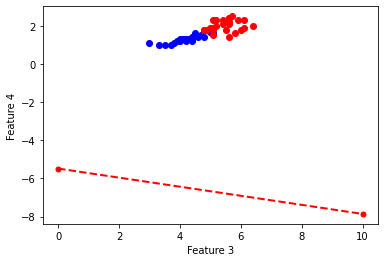

In [16]:
# part 1 _ 2
feature = [2, 3]
C12, C21 = 1, 1

train_data, test_data, train_label, test_label, train_data_positive, train_data_negative, test_data_positive, test_data_negative = get_test_and_train(feature)

weight_2 = get_weight()

bias_2 = get_bias(train_data, C12 = 1, C21 = 1)

hyperplane = get_hyperplane(train_data)

accuracy_2, TPR_2, FPR_2 = get_predict(test_data)

print("Accuracy_2 is {}%".format(accuracy_2))

In [75]:
average = (accuracy_1 + accuracy_2) / 2
print("Average of accuracy is {}%".format(average))

Average of accuracy is 50.0%
